Wrong estimated angle: -1.0479087383630983
True  estimated angle: -2.7371850240199795


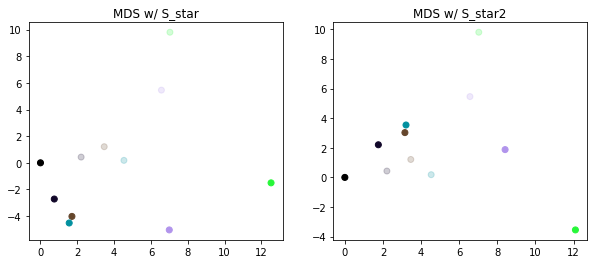

[[ 0.          0.44848289 -5.07138488  0.30846825 -1.84391772  1.32098672]
 [ 0.         -1.77254836 13.34343995 -1.81387015  3.57852688 -3.35357006]]
Wrong estimated angle: 2.7996384695748224
True  estimated angle: -0.301546924778314


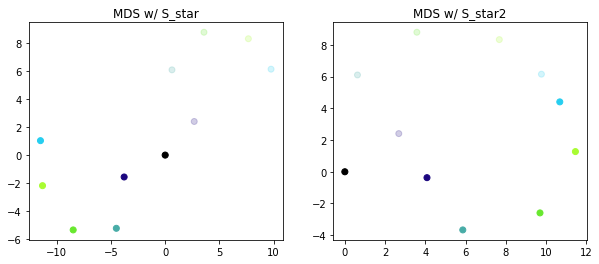

[[ 0.         -3.78241174 -1.40226652 -0.91257158 -5.23466584 -6.11936041]
 [ 0.          7.06032652  2.77875546  1.74635639  9.77082906 11.39069511]]


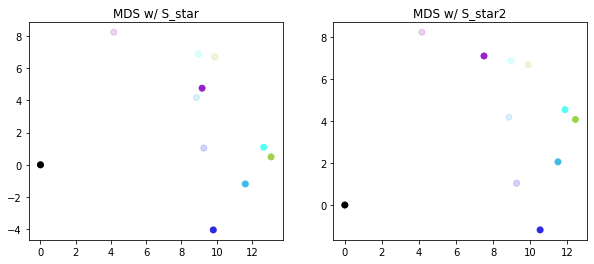

[[ 0.         -2.90902564 -2.64733119 -1.27057912 -2.55200845 -3.34857654]
 [ 0.          2.33146971  2.1221078   2.22217417  2.62030596  1.13034682]]
Wrong estimated angle: -2.9687823650351524
True  estimated angle: -0.8163113973479252


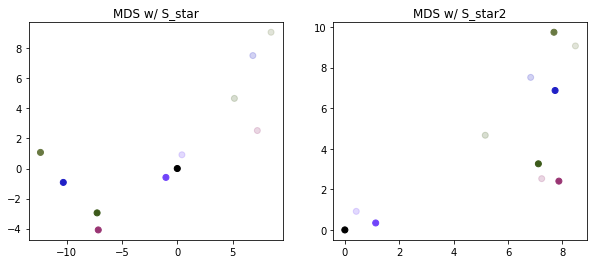

[[ 0.         -0.89785195 -0.63165666 -0.71404683 -1.95242778  0.78889546]
 [ 0.          0.64550908  0.12291108  0.57150971  1.40630932 -0.6742313 ]]
Wrong estimated angle: 1.06342839183287
True  estimated angle: 1.4346631529636389


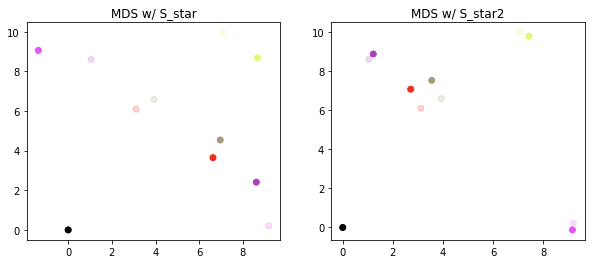

[[ 0.          0.40471755  0.03447088 -0.35456591 -0.17104721  0.38177953]
 [ 0.         -0.97118337  0.33385428  0.20255096 -0.27372105 -0.93143213]]
Wrong estimated angle: 0.05975760981975363
True  estimated angle: 2.438333934976755


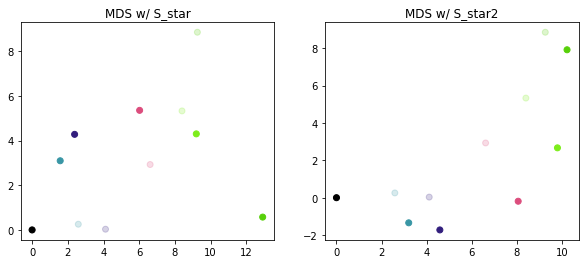

[[ 0.         -0.96469659 -1.44483846 -0.61570982 -0.47168774 -1.40020822]
 [ 0.          0.93754417  3.11848338  1.59886254  1.75571718  2.66250692]]
Wrong estimated angle: -2.558604835683218
True  estimated angle: -1.22648892669986


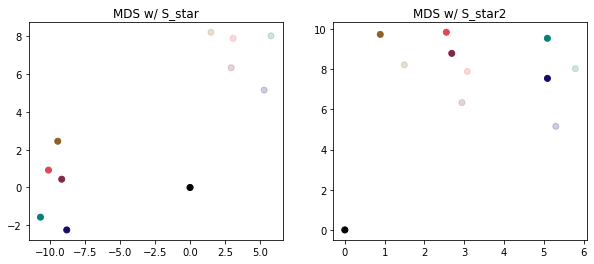

[[ 0.          0.60558764  0.7046361   0.52731429  0.20875108  0.25632963]
 [ 0.         -1.51665989 -1.51370857 -1.94787763 -2.3871562  -2.45055511]]


/mnt/c/Users/pierf/Desktop/drone-pose-estimation/UAV/Algebra.py:162: ComplexWarning: Casting complex values to real discards the imaginary part
  LAMBDA[i,i] = ev[ind]
/mnt/c/Users/pierf/Desktop/drone-pose-estimation/UAV/Algebra.py:163: ComplexWarning: Casting complex values to real discards the imaginary part
  U[:,i] = EV[:,ind]


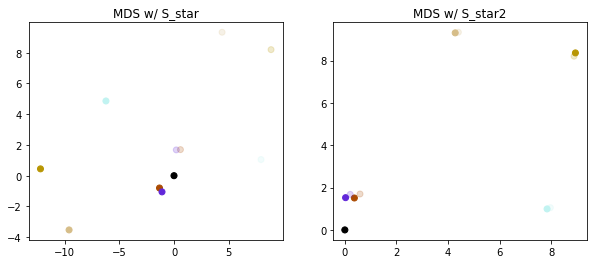

[[ 0.          0.12334591  0.12751464  0.21976521  0.18009131 -0.05292425]
 [ 0.          0.02937165  0.05976016  0.18962397  0.15545308 -0.15651406]]


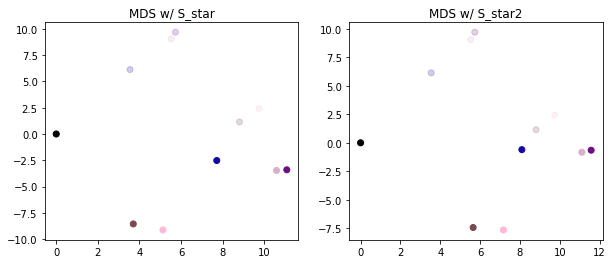

[[ 0.         -5.84621249 -5.58237524  2.57103381  3.15680033 -4.55038624]
 [ 0.         10.33623964  9.87845344 10.05967308  8.56574926  6.72977125]]


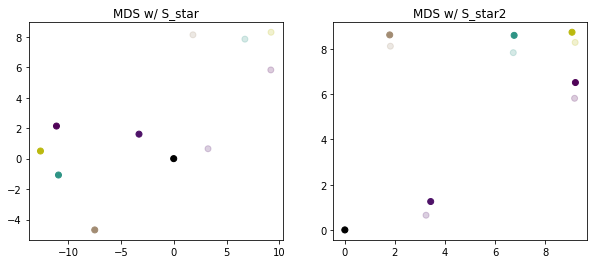

[[ 0.         -0.03393326  0.02669306 -0.03374868 -0.18603411  0.12422471]
 [ 0.         -0.76520505 -0.50019273 -0.69820061 -0.60566278 -0.44996797]]


In [1]:
import numpy as np
from UAV import *
import random
import matplotlib.pyplot as plt   


n_robots = 6#int(input("number of robots: "))
n_components = 2



for _ in range(10):
    platoon = []


    # initialization of n robots
    for i in range(n_robots):
        if i==0:
            i_robot = Robot("op_" + str(i),0,0,0)
        else:
            i_robot = Robot("op_" + str(i),random.uniform(0, 10.0),random.uniform(0, 10.0),0)
        platoon.append(i_robot)

    coordinates = [[],[],[]]

    for rob in platoon:
        coordinates = np.append(coordinates,rob.get_coords(),axis=1)

    #TRUE COORDINATES [REALITY: THEY ARE UNKNOWN]
    S = coordinates[0:2,:]

    DM2 = d_matrix2(platoon) #squared distance matrix -> for formulas

    S_star = EVD(DM2,n_components)
    S_star = match_anchor(S,S_star,verbose=0)

    deltaX1 = 0.3
    deltaY1 = 0.1

    DeltaS_prime = np.array([[0 for i in range(n_robots)] for j in range(2)],dtype=float)
    DeltaS_prime[:,0] = [deltaX1,deltaY1]

    S_prime = S + DeltaS_prime
    DM_prime = DM_from_S(S_prime,verbose=0)

    theta_r   = estimate_theta(DM2,DM_prime,S_star,[deltaX1,deltaY1],verbose=0)
    S_star2 = rotateMatrix(theta_r)@S_star

    deltaX2 = 0.7
    deltaY2 = 0.4

    DeltaS_prime2 = np.array([[0 for i in range(n_robots)] for j in range(2)],dtype=float)
    DeltaS_prime2[:,0] = [deltaX2,deltaY2]

    S_prime2 = S + DeltaS_prime2
    DM_prime2 = DM_from_S(S_prime2,verbose=0)


    theta_r2 = estimate_theta(DM2,DM_prime2,S_star2,[deltaX2,deltaY2],approx=2,verbose=0)


    if (theta_r2 != 0):
        F = np.array([[-1,0],[0,1]])
            
        theta_r3 = estimate_theta(DM2,DM_prime,F@S_star,[deltaX1,deltaY1],verbose=0)
        theta_r3_a = estimate_theta(DM2,DM_prime,F@S_star,[deltaX1,deltaY1],approx=1,verbose=0)

        print("Wrong estimated angle:",theta_r)
        print("True  estimated angle:", theta_r3)

        S_star2 = rotateMatrix(theta_r3)@F@S_star


    plot_points(S,S_star  = S_star,
                S_star2 = S_star2
                )
    print(S-S_star2)